## Import Dependencies

In [112]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem, ttest_ind, linregress, iqr
from scipy import stats

## Create a Dataframe From Our Data

In [55]:
listings = pd.read_csv('Resources/listings.csv')
listings.head()

,id,host_name,host_response_time,host_is_superhost,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,price,number_of_reviews,last_review,review_scores_rating
0,177,Joe,within an hour,t,Virginia Village,Virginia Village,80246.0,39.69585,-104.92582,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,NaN,$56.00,39,3/24/19,94.0
1,360,Jennifer & Giovanni,within an hour,t,Highland,Highland,80211.0,39.76703,-105.00256,Guesthouse,Entire home/apt,5,1.0,2.0,2.0,NaN,$140.00,48,3/29/19,100.0
2,590,Jill,within an hour,t,North Park Hill,North Park Hill,80207.0,39.75361,-104.91237,House,Private room,3,1.0,1.0,1.0,NaN,$61.00,565,3/27/19,97.0
3,592,Jill,within an hour,t,North Park Hill,North Park Hill,80207.0,39.75438,-104.91156,House,Private room,2,1.0,1.0,1.0,NaN,$42.00,147,3/22/19,97.0
4,686,Alexandra,within an hour,f,North Capitol Hill,North Capitol Hill,80203.0,39.74503,-104.97756,House,Private room,2,2.0,1.0,1.0,NaN,$70.00,236,4/16/19,95.0


In [56]:
len(listings)

4686

## Data Cleaning

In [57]:
listings.price = [x.strip('$') for x in listings.price]
listings['price']=listings['price'].str.replace(',','')
listings['price']=listings['price'].astype(float)
listings.head()

,id,host_name,host_response_time,host_is_superhost,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,price,number_of_reviews,last_review,review_scores_rating
0,177,Joe,within an hour,t,Virginia Village,Virginia Village,80246.0,39.69585,-104.92582,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,NaN,56.0,39,3/24/19,94.0
1,360,Jennifer & Giovanni,within an hour,t,Highland,Highland,80211.0,39.76703,-105.00256,Guesthouse,Entire home/apt,5,1.0,2.0,2.0,NaN,140.0,48,3/29/19,100.0
2,590,Jill,within an hour,t,North Park Hill,North Park Hill,80207.0,39.75361,-104.91237,House,Private room,3,1.0,1.0,1.0,NaN,61.0,565,3/27/19,97.0
3,592,Jill,within an hour,t,North Park Hill,North Park Hill,80207.0,39.75438,-104.91156,House,Private room,2,1.0,1.0,1.0,NaN,42.0,147,3/22/19,97.0
4,686,Alexandra,within an hour,f,North Capitol Hill,North Capitol Hill,80203.0,39.74503,-104.97756,House,Private room,2,2.0,1.0,1.0,NaN,70.0,236,4/16/19,95.0


In [58]:
listings_no_NaN = listings.drop('square_feet', 1)
listings_no_NaN.head()

,id,host_name,host_response_time,host_is_superhost,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,last_review,review_scores_rating
0,177,Joe,within an hour,t,Virginia Village,Virginia Village,80246.0,39.69585,-104.92582,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,56.0,39,3/24/19,94.0
1,360,Jennifer & Giovanni,within an hour,t,Highland,Highland,80211.0,39.76703,-105.00256,Guesthouse,Entire home/apt,5,1.0,2.0,2.0,140.0,48,3/29/19,100.0
2,590,Jill,within an hour,t,North Park Hill,North Park Hill,80207.0,39.75361,-104.91237,House,Private room,3,1.0,1.0,1.0,61.0,565,3/27/19,97.0
3,592,Jill,within an hour,t,North Park Hill,North Park Hill,80207.0,39.75438,-104.91156,House,Private room,2,1.0,1.0,1.0,42.0,147,3/22/19,97.0
4,686,Alexandra,within an hour,f,North Capitol Hill,North Capitol Hill,80203.0,39.74503,-104.97756,House,Private room,2,2.0,1.0,1.0,70.0,236,4/16/19,95.0


In [60]:
listings_cleaned = listings_no_NaN.dropna()
listings_cleaned.head()

,id,host_name,host_response_time,host_is_superhost,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,last_review,review_scores_rating
0,177,Joe,within an hour,t,Virginia Village,Virginia Village,80246.0,39.69585,-104.92582,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,56.0,39,3/24/19,94.0
1,360,Jennifer & Giovanni,within an hour,t,Highland,Highland,80211.0,39.76703,-105.00256,Guesthouse,Entire home/apt,5,1.0,2.0,2.0,140.0,48,3/29/19,100.0
2,590,Jill,within an hour,t,North Park Hill,North Park Hill,80207.0,39.75361,-104.91237,House,Private room,3,1.0,1.0,1.0,61.0,565,3/27/19,97.0
3,592,Jill,within an hour,t,North Park Hill,North Park Hill,80207.0,39.75438,-104.91156,House,Private room,2,1.0,1.0,1.0,42.0,147,3/22/19,97.0
4,686,Alexandra,within an hour,f,North Capitol Hill,North Capitol Hill,80203.0,39.74503,-104.97756,House,Private room,2,2.0,1.0,1.0,70.0,236,4/16/19,95.0


In [61]:
len(listings_cleaned)

3642

## Identifying and Removing Price Outliers

Price IQR: 90.75, Price Median: 100.0
Price Lower Limit: -36.125, Price Upper Limit: 236.125


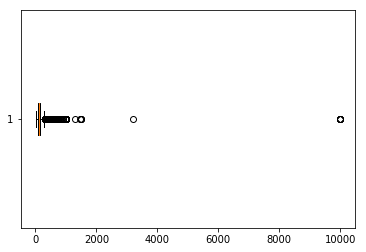

In [62]:
price_iqr = iqr(listings_cleaned.price)
price_median = listings_cleaned.price.median()
print(f'Price IQR: {price_iqr}, Price Median: {price_median}')
price_lower_limit  = price_median - 1.5* price_iqr
price_upper_limit = price_median + 1.5 * price_iqr
print(f'Price Lower Limit: {price_lower_limit}, Price Upper Limit: {price_upper_limit}')

plt.boxplot(listings_cleaned["price"], vert = False)
plt.show()

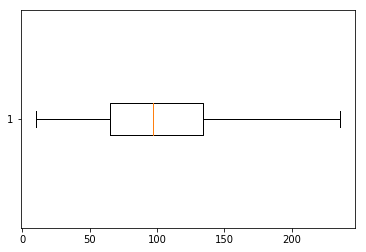

In [50]:
without_price_outliers = listings_cleaned.loc[(listings_cleaned["price"] < price_upper_limit) & (listings_cleaned["price"] > price_lower_limit)]
plt.boxplot(without_price_outliers["price"], vert = False)
plt.show()

In [53]:
print(without_price_outliers["price"].max())

236.0


In [209]:
listings_no_outliers = listings_cleaned[listings_cleaned.price < 237]
listings_no_outliers.head()

,id,host_name,host_response_time,host_is_superhost,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,last_review,review_scores_rating
0,177,Joe,within an hour,t,Virginia Village,Virginia Village,80246.0,39.69585,-104.92582,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,56.0,39,3/24/19,94.0
1,360,Jennifer & Giovanni,within an hour,t,Highland,Highland,80211.0,39.76703,-105.00256,Guesthouse,Entire home/apt,5,1.0,2.0,2.0,140.0,48,3/29/19,100.0
2,590,Jill,within an hour,t,North Park Hill,North Park Hill,80207.0,39.75361,-104.91237,House,Private room,3,1.0,1.0,1.0,61.0,565,3/27/19,97.0
3,592,Jill,within an hour,t,North Park Hill,North Park Hill,80207.0,39.75438,-104.91156,House,Private room,2,1.0,1.0,1.0,42.0,147,3/22/19,97.0
4,686,Alexandra,within an hour,f,North Capitol Hill,North Capitol Hill,80203.0,39.74503,-104.97756,House,Private room,2,2.0,1.0,1.0,70.0,236,4/16/19,95.0


In [212]:
len(listings_no_outliers)

3182

In [213]:
listings_no_outliers.describe()

,id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
count,3.182000e+03,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2.033397e+07,80211.648649,39.740317,-104.976387,3.966688,1.331867,1.519485,2.086109,103.878378,59.179447,96.918290
std,8.844550e+06,15.120091,0.031671,0.055095,2.312607,0.754646,0.885152,1.414481,49.932932,74.939876,4.461676
min,1.770000e+02,80010.000000,39.617620,-105.094550,1.000000,0.500000,0.000000,0.000000,10.000000,1.000000,20.000000
25%,1.449461e+07,80205.000000,39.725572,-105.013010,2.000000,1.000000,1.000000,1.000000,65.000000,11.250000,96.000000
50%,2.166673e+07,80210.000000,39.747695,-104.982450,4.000000,1.000000,1.000000,2.000000,97.000000,33.000000,98.000000
75%,2.757296e+07,80218.000000,39.762017,-104.958193,5.000000,1.500000,2.000000,3.000000,134.000000,77.000000,100.000000
max,3.394430e+07,80249.000000,39.809280,-104.734600,18.000000,17.000000,6.000000,12.000000,236.000000,757.000000,100.000000


## Feature Exploration

### Scatter Matrix (Numerical Features Only)

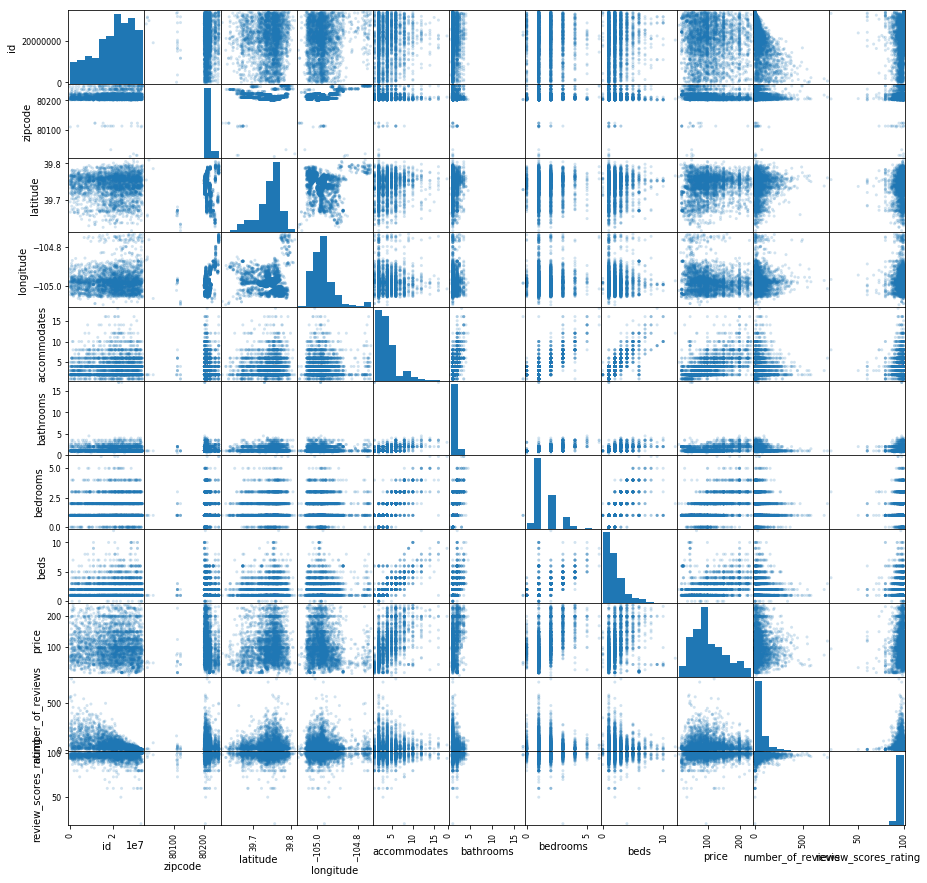

In [67]:
from pandas.plotting import scatter_matrix
scatter_matrix(listings_no_outliers, alpha=0.2, figsize=(15,15))
plt.show()

### KBest - F_Regression (Numerical Features Only)

In [206]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_kbest = listings_no_outliers[["zipcode", "latitude", "accommodates", "bathrooms", "bedrooms", "beds", "number_of_reviews", "review_scores_rating"]]
y_kbest = listings_no_outliers.price

bestfeatures = SelectKBest(score_func=f_regression, k=8)
fit = bestfeatures.fit(X_kbest,y_kbest)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_kbest.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(8,'Score'))

                  Specs        Score
4              bedrooms  1480.329141
2          accommodates  1460.524178
5                  beds   563.386847
3             bathrooms   293.647812
1              latitude    66.048471
7  review_scores_rating    46.631985
0               zipcode    24.524557
6     number_of_reviews    10.516847


## ANOVA Analysis of Most Important Features

### Are Prices Between Neighborhoods Statistically Significant?

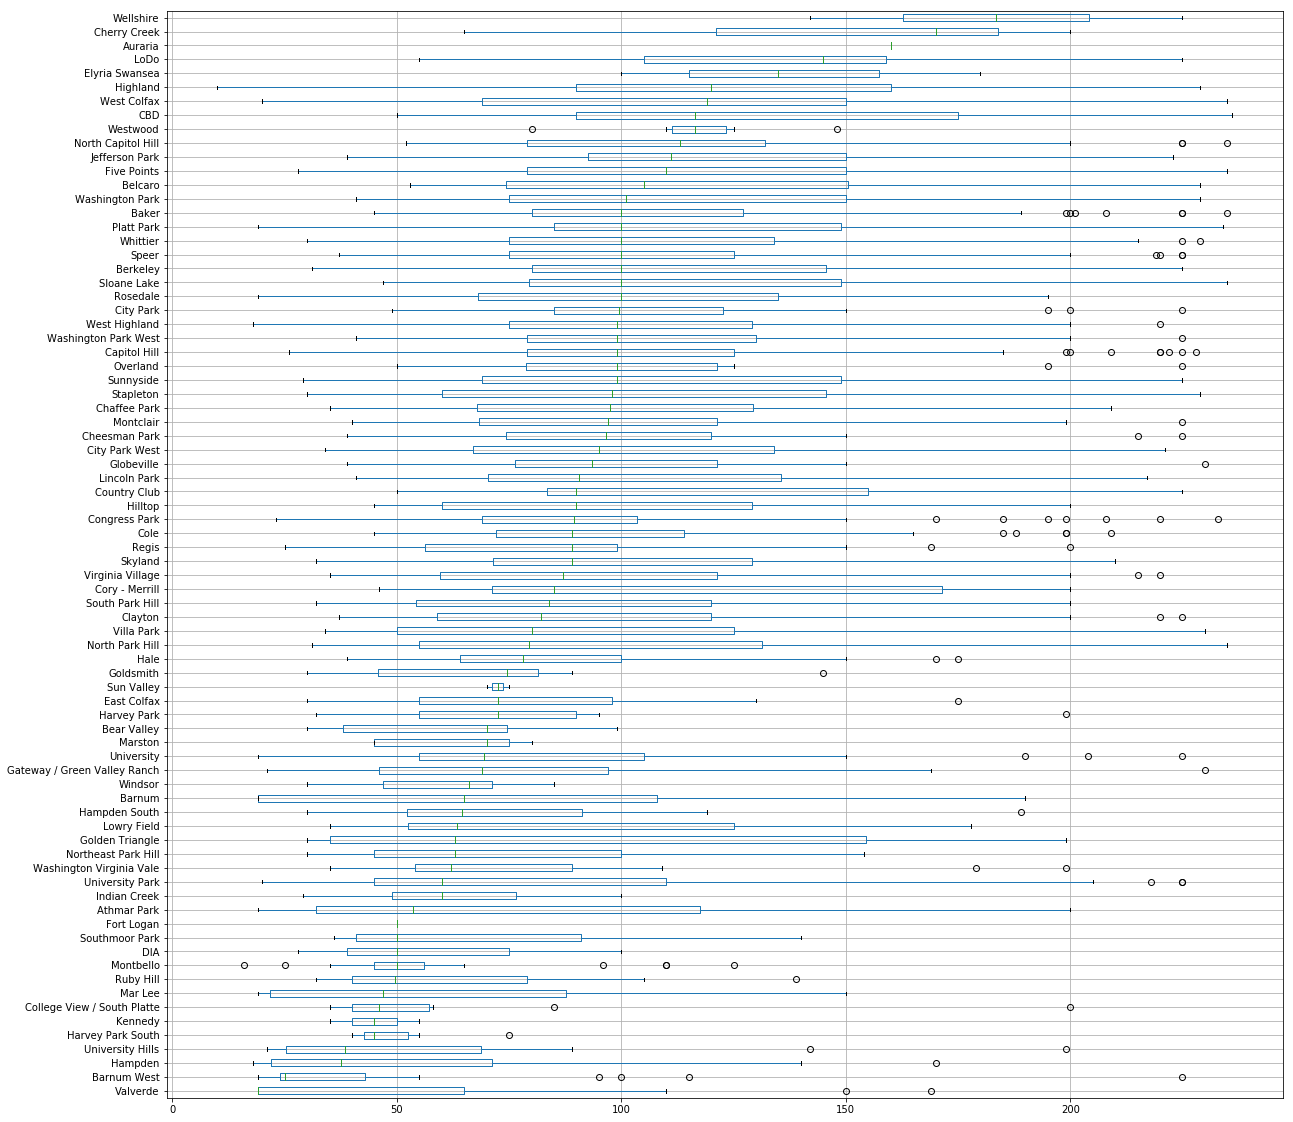

In [220]:
#thanks to Nate for help on sorting the boxplot!
def boxplot_sorted(df, by, column, rot=0):
    # use dict comprehension to create new dataframe
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes",figsize=(20, 20), vert=False)
boxplot_sorted(listings_no_outliers.loc[listings_no_outliers['price']<1000], by='neighbourhood', column='price')

In [143]:
#listings_no_outliers.boxplot("price", by="neighbourhood", figsize=(20, 10))
group1 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Wellshire"]["price"]
group2 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Cherry Creek"]["price"]
group3 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Auraria"]["price"]
group4 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "LoDo"]["price"]
group5 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Elyria Swansea"]["price"]
group6 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Highland"]["price"]
group7 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "West Colfax"]["price"]
group1 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "CBD"]["price"]
group2 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Westwood"]["price"]
group3 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "North Capitol Hill"]["price"]
group4 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Jefferson Park"]["price"]
group5 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Five Points"]["price"]
group6 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Belcaro"]["price"]
group7 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Washington Park"]["price"]
group8 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Baker"]["price"]
group9 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Platt Park"]["price"]
group10 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Whittier"]["price"]
group11 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Speer"]["price"]
group12 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Berkeley"]["price"]
group13 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Sloane Lake"]["price"]
group14 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Rosedale"]["price"]
group15 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "City Park"]["price"]
group16 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "West Highland"]["price"]
group17 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Washington Park West"]["price"]
group18 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Capitol Hill"]["price"]
group19 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Overland"]["price"]
group20 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Sunnyside"]["price"]
group21 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Stapleton"]["price"]
group22 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Montclair"]["price"]
group23 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Cheesman Park"]["price"]
group24 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "City Park West"]["price"]
group25 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Globeville"]["price"]
group26 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Lincoln Park"]["price"]
group27 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Country Club"]["price"]
group28 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Congress Park"]["price"]
group29 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Hilltop"]["price"]
group30 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Cole"]["price"]
group31 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Regis"]["price"]
group32 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Skyland"]["price"]
group33 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Virginia Village"]["price"]
group34 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Cory - Merrill"]["price"]
group35 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "South Park Hill"]["price"]
group36 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Clayton"]["price"]
group37 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Villa Park"]["price"]
group38 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "North Park Hill"]["price"]
group39 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Hale"]["price"]
group40 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Goldsmith"]["price"]
group41 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Sun Valley"]["price"]
group42 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "East Colfax"]["price"]
group43 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Harvey Park"]["price"]
group44 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Bear Valley"]["price"]
group45 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Marston"]["price"]
group46 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "University"]["price"]
group47 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Gateway / Green Valley Ranch"]["price"]
group48 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Windsor"]["price"]
group49 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Barnum"]["price"]
group50 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Hampden South"]["price"]
group51 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Lowry Field"]["price"]
group52 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Golden Triangle"]["price"]
group53 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Northeast Park Hill"]["price"]
group54 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Washington Virginia Vale"]["price"]
group55 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "University Park"]["price"]
group56 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Indian Creek"]["price"]
group57 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Athmar Park"]["price"]
group58 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Fort Logan"]["price"]
group59 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Southmoor Park"]["price"]
group60 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "DIA"]["price"]
group61 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Ruby Hill"]["price"]
group62 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Mar Lee"]["price"]
group63 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "College View / South Platte"]["price"]
group64 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Kennedy"]["price"]
group65 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Harvey Park South"]["price"]
group66 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "University Hills"]["price"]
group67 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Hampden"]["price"]
group68 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Barnum West"]["price"]
group69 = listings_no_outliers[listings_no_outliers["neighbourhood"] == "Valverde"]["price"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12, group13, group14, group15, group16, group17, group18, group19, group20, group21, group22, group23, group24, group25, group26, group27, group28, group29, group30, group31, group32, group33, group34, group35, group36, group37, group38, group39, group40, group41, group42, group43, group44, group45, group46, group47, group48, group49, group50, group51, group52, group53, group54, group55, group56, group57, group58, group59, group60, group61, group62, group63, group64, group65, group66, group67, group68, group69)

F_onewayResult(statistic=5.399624768635497, pvalue=2.948234932626935e-39)

### Are Prices Between Listings with Different Room Types Statistically Significant?

F_onewayResult(statistic=825.0370803229453, pvalue=2.4499931428539647e-289)

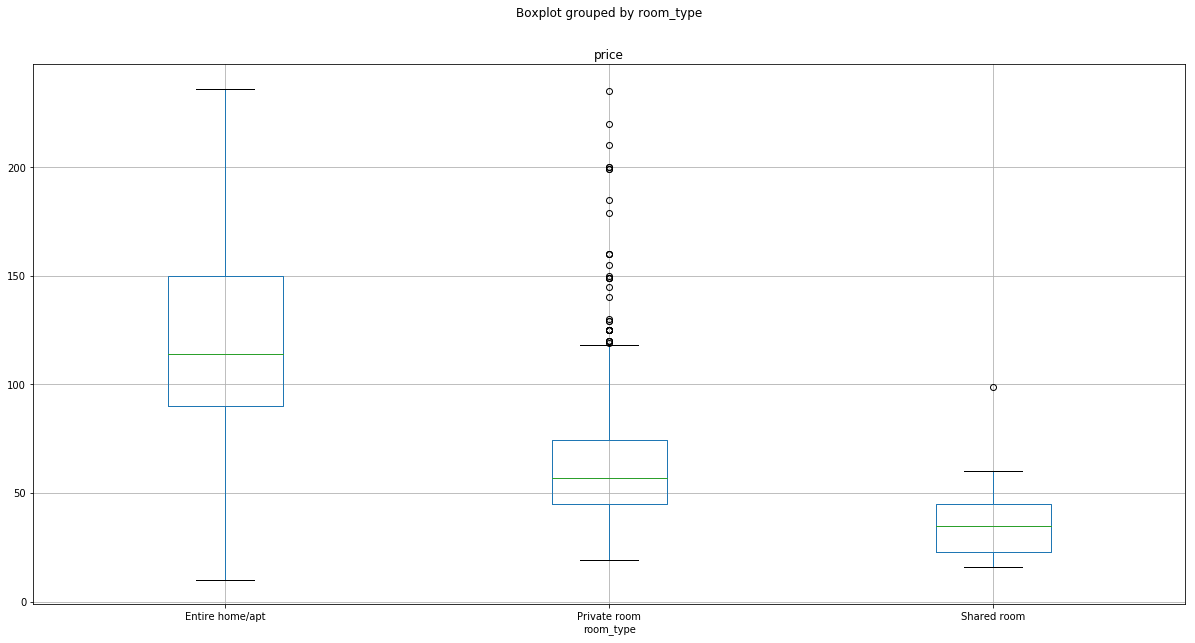

In [211]:
listings_no_outliers.boxplot("price", by="room_type", figsize=(20, 10))
group1 = listings_no_outliers[listings_no_outliers["room_type"] == "Entire home/apt"]["price"]
group2 = listings_no_outliers[listings_no_outliers["room_type"] == "Private room"]["price"]
group3 = listings_no_outliers[listings_no_outliers["room_type"] == "Shared room"]["price"]
stats.f_oneway(group1, group2, group3)

### Are Prices Between Listings with Different #s of Bedrooms Statistically Significant?

F_onewayResult(statistic=318.7568138503214, pvalue=1.546e-320)

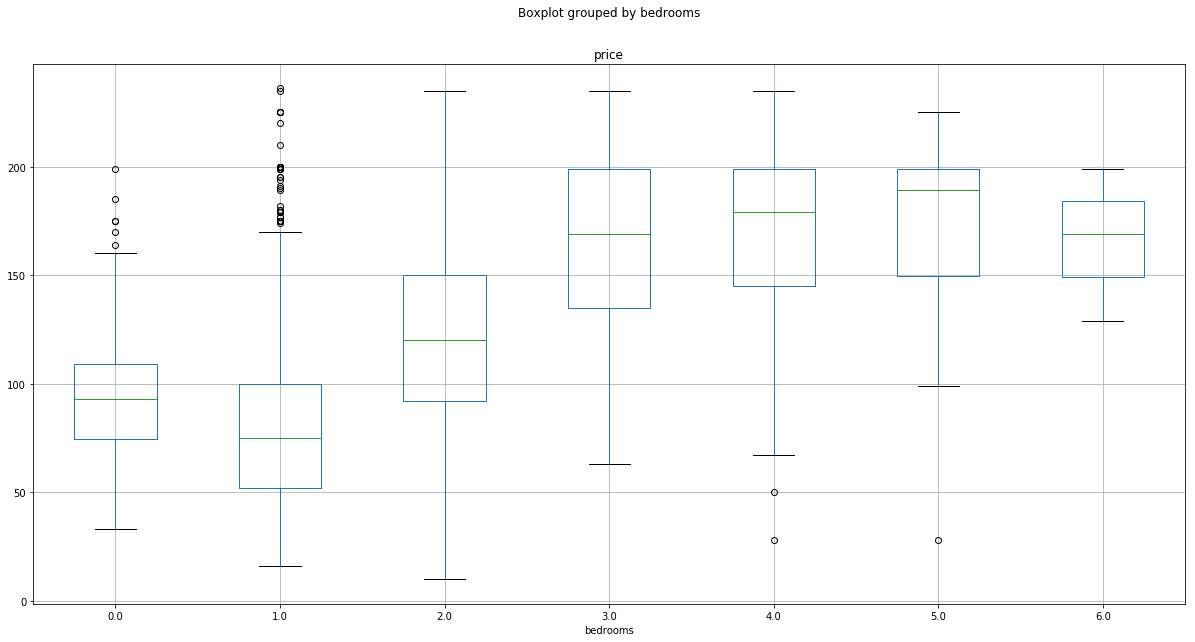

In [114]:
listings_no_outliers.boxplot("price", by="bedrooms", figsize=(20, 10))
group1 = listings_no_outliers[listings_no_outliers["bedrooms"] == 0]["price"]
group2 = listings_no_outliers[listings_no_outliers["bedrooms"] == 1]["price"]
group3 = listings_no_outliers[listings_no_outliers["bedrooms"] == 2]["price"]
group4 = listings_no_outliers[listings_no_outliers["bedrooms"] == 3]["price"]
group5 = listings_no_outliers[listings_no_outliers["bedrooms"] == 4]["price"]
group6 = listings_no_outliers[listings_no_outliers["bedrooms"] == 5]["price"]
group7 = listings_no_outliers[listings_no_outliers["bedrooms"] == 6]["price"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

### Are Prices Between Listings that Accomodate Different #s Statistically Significant?

F_onewayResult(statistic=208.99911276099738, pvalue=3.6437984455277814e-222)

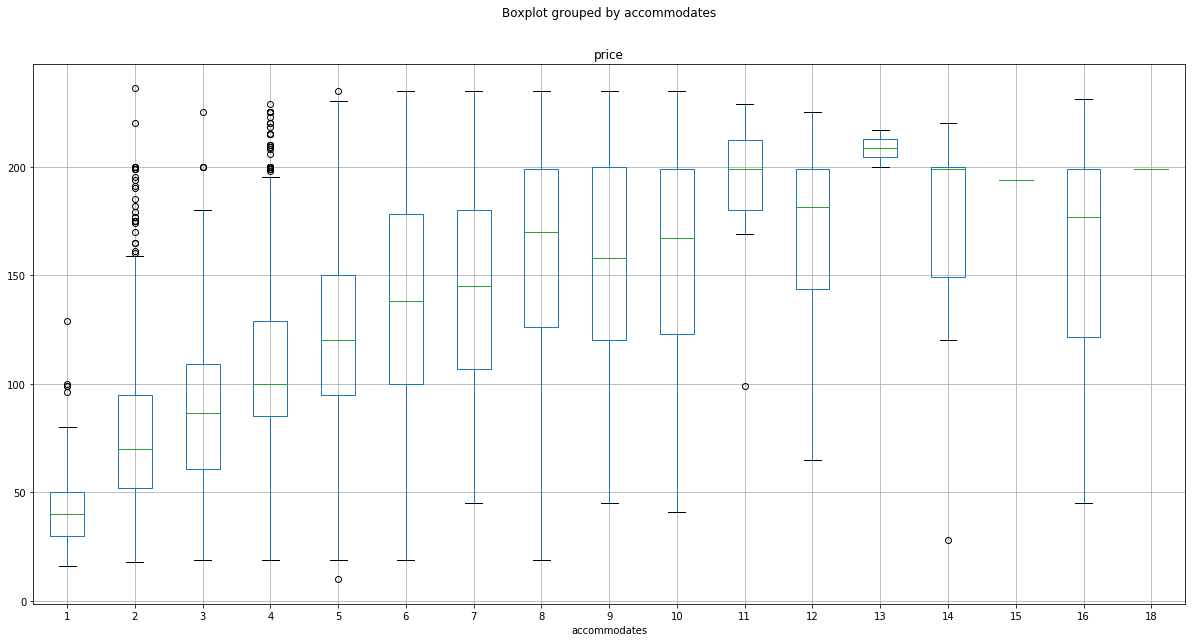

In [113]:
listings_no_outliers.boxplot("price", by="accommodates", figsize=(20, 10))
group1 = listings_no_outliers[listings_no_outliers["accommodates"] == 1]["price"]
group2 = listings_no_outliers[listings_no_outliers["accommodates"] == 2]["price"]
group3 = listings_no_outliers[listings_no_outliers["accommodates"] == 3]["price"]
group4 = listings_no_outliers[listings_no_outliers["accommodates"] == 4]["price"]
group5 = listings_no_outliers[listings_no_outliers["accommodates"] == 5]["price"]
group6 = listings_no_outliers[listings_no_outliers["accommodates"] == 6]["price"]
group7 = listings_no_outliers[listings_no_outliers["accommodates"] == 7]["price"]
group8 = listings_no_outliers[listings_no_outliers["accommodates"] == 8]["price"]
group9 = listings_no_outliers[listings_no_outliers["accommodates"] == 9]["price"]
group10 = listings_no_outliers[listings_no_outliers["accommodates"] == 10]["price"]
group11 = listings_no_outliers[listings_no_outliers["accommodates"] == 11]["price"]
group12 = listings_no_outliers[listings_no_outliers["accommodates"] == 12]["price"]
group13 = listings_no_outliers[listings_no_outliers["accommodates"] == 13]["price"]
group14 = listings_no_outliers[listings_no_outliers["accommodates"] == 14]["price"]
group15 = listings_no_outliers[listings_no_outliers["accommodates"] == 15]["price"]
group16 = listings_no_outliers[listings_no_outliers["accommodates"] == 16]["price"]
group17 = listings_no_outliers[listings_no_outliers["accommodates"] == 17]["price"]
group18 = listings_no_outliers[listings_no_outliers["accommodates"] == 18]["price"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

## Building Predictive Models Using All Features

### Selecting Dependent / Independent Variables

In [189]:
X = listings_no_outliers[["id", "host_name", "host_response_time", "host_is_superhost", "neighbourhood", "neighbourhood_cleansed", "zipcode", "latitude", "longitude", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "number_of_reviews", "last_review", "review_scores_rating"]]
y = listings_no_outliers["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(3182, 18) (3182, 1)


### One Hot Encoding using Dummification

In [190]:
data = X.copy()
data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,...,last_review_9/29/18,last_review_9/3/18,last_review_9/30/18,last_review_9/5/17,last_review_9/5/18,last_review_9/6/17,last_review_9/7/15,last_review_9/8/17,last_review_9/8/18,last_review_9/9/18
0,177,80246.0,39.69585,-104.92582,2,1.0,1.0,1.0,39,94.0,...,0,0,0,0,0,0,0,0,0,0
1,360,80211.0,39.76703,-105.00256,5,1.0,2.0,2.0,48,100.0,...,0,0,0,0,0,0,0,0,0,0
2,590,80207.0,39.75361,-104.91237,3,1.0,1.0,1.0,565,97.0,...,0,0,0,0,0,0,0,0,0,0
3,592,80207.0,39.75438,-104.91156,2,1.0,1.0,1.0,147,97.0,...,0,0,0,0,0,0,0,0,0,0
4,686,80203.0,39.74503,-104.97756,2,2.0,1.0,1.0,236,95.0,...,0,0,0,0,0,0,0,0,0,0


### Splitting up the Data into Training and Testing Sets

In [191]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,...,last_review_9/29/18,last_review_9/3/18,last_review_9/30/18,last_review_9/5/17,last_review_9/5/18,last_review_9/6/17,last_review_9/7/15,last_review_9/8/17,last_review_9/8/18,last_review_9/9/18
2710,23669531,80222.0,39.68773,-104.93571,12,2.0,5.0,5.0,1,100.0,...,0,0,0,0,0,0,0,0,0,0
2612,23199150,80205.0,39.75644,-104.98649,2,1.0,0.0,1.0,3,100.0,...,0,0,0,0,0,0,0,0,0,0
3671,28959875,80211.0,39.77832,-105.03522,4,1.0,0.0,2.0,35,99.0,...,0,0,0,0,0,0,0,0,0,0
264,4284131,80218.0,39.74619,-104.96732,2,1.0,1.0,1.0,37,97.0,...,0,0,0,0,0,0,0,0,0,0
14,98008,80218.0,39.74927,-104.97482,2,1.0,1.0,1.0,203,99.0,...,0,0,0,0,0,0,0,0,0,0


### Scaling and Transforming the Data

In [192]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [193]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Running the LinearRegression Model on our Data

In [194]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [195]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 6.442117266087765e+27, R2: -6.63257118991112e+27


### Plotting the Residuals (Error Visualization)

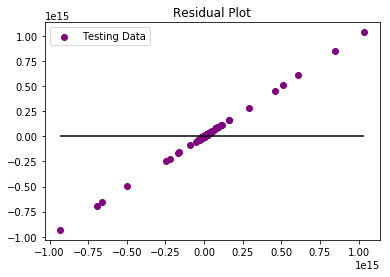

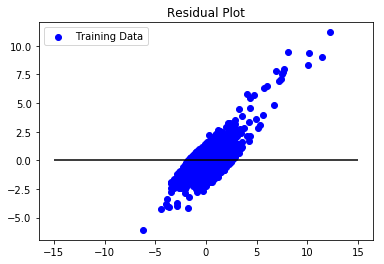

In [216]:
#plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(predictions, predictions - y_test_scaled, c="purple", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
#plt.scatter(predictions, predictions - y_test_scaled, c="purple", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-15, xmax=15)
plt.title("Residual Plot")
plt.show()

## Running the Ridge Model on Our Data

In [207]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2).fit(X_train_scaled, y_train_scaled)
ridge_predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, ridge_predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5591460038723216, R2: 0.42432347579886986


### Plotting the Residuals (Error Visualization)

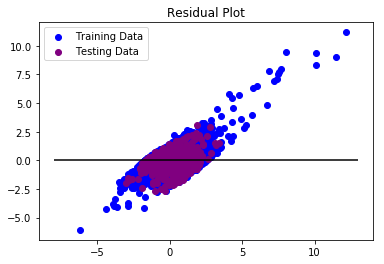

In [218]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(ridge_predictions, ridge_predictions - y_test_scaled, c="purple", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-8, xmax=13)
plt.title("Residual Plot")
plt.show()

# Plot Residuals
# plt.scatter(ridge_predictions, ridge_predictions - y_test_scaled, c="purple", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=ridge_predictions.min(), xmax=ridge_predictions.max())
# plt.show()